In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("OtherDatasets/KenPom Barttorvik.csv")
df.head()


,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,276,238,199,19,176,164,47,122,51,249
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,13,33,8,156,106,10,314,2,263,7
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,16,50,37,196,7,195,134,8,14,47
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,58,86,76,127,69,59,284,12,8,69
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,274,31,22,304,34,97,254,15,155,1


In [3]:
df2 = pd.read_csv("OtherDatasets/Heat Check Tournament Index.csv")
df2.head()


,YEAR,TEAM NO,TEAM,SEED,ROUND,POWER,PATH,DRAW,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,VAL Z-SCORE,POWER-PATH
0,2024,1067,Connecticut,1,1,91.3,64.5,NaN,6,92.6,1,1,NaN,26.8
1,2024,1026,Stetson,16,64,47.1,91.0,NaN,0,0.5,64,62,NaN,-43.9
2,2024,1060,Florida Atlantic,8,64,69.3,73.2,NaN,0,9.0,28,31,NaN,-3.9
3,2024,1036,Northwestern,9,32,62.9,75.5,NaN,1,4.2,45,36,NaN,-12.6
4,2024,1029,San Diego St.,5,16,71.5,68.2,NaN,2,14.7,22,18,NaN,3.3


In [4]:
merged_df = pd.merge(df, df2, on='TEAM NO', how='inner')
X = merged_df[['WIN%', 'EFG%', 'BLK%', 'AST%', '3PTR', 'AVG HGT', 'EXP', 'FT%', 'TALENT', 'OREB%', 'DREB%', 'PPPO', '2PT%', '3PT%', 'TOV%', 'K TEMPO', 'K OFF', 'K DEF', 'GAMES', '2PTR']]
y = merged_df['WINS']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
feature_importances = gbr.feature_importances_

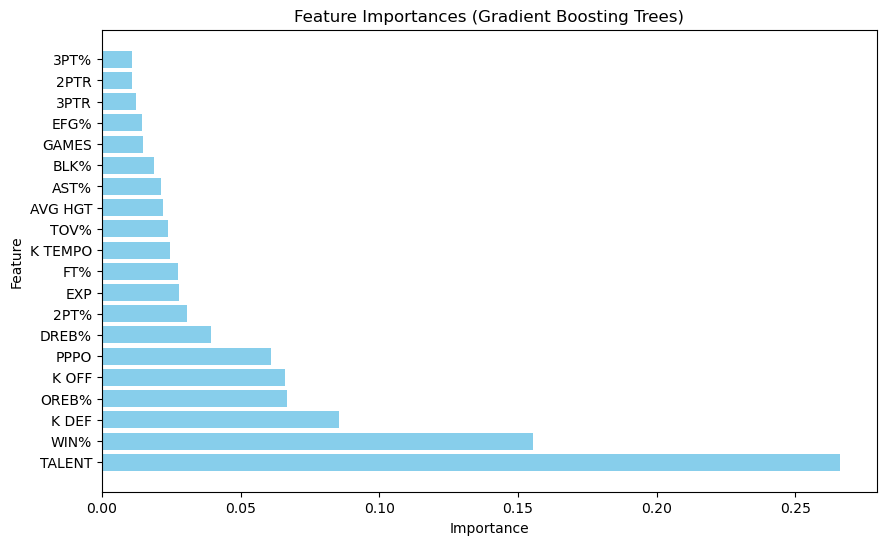

In [6]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Gradient Boosting Trees)')
plt.show()

In [7]:
tree_depth = gbr.max_depth
num_estimators = len(gbr.estimators_)
print("Tree Depth:", tree_depth)
print("Number of Estimators:", num_estimators)

Tree Depth: 3
Number of Estimators: 100


In [8]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
feature_importances = rfr.feature_importances_



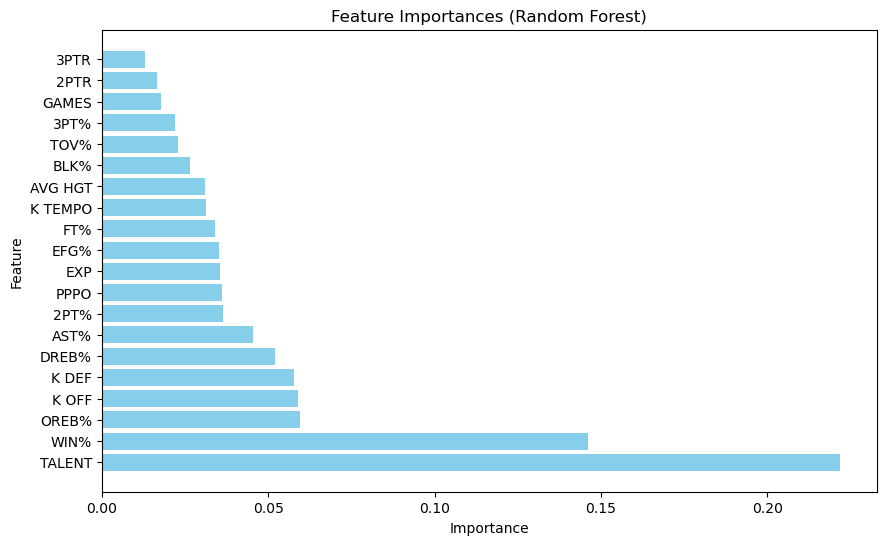

In [9]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()

In [10]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_bootstrapped = pd.concat([X_scaled, y], axis=1)
n_samples = 50
rfr = RandomForestRegressor()
columns = df_bootstrapped.drop('WINS', axis=1).columns
coefficients = pd.DataFrame(index=columns, columns=range(n_samples))

for k in range(n_samples):
    df_bootstrap = df_bootstrapped.sample(frac=1.0, replace=True)
    X_bootstrap = df_bootstrap.drop('WINS', axis=1)
    y_bootstrap = df_bootstrap['WINS']
    rfr.fit(X_bootstrap, y_bootstrap)
    coefficients.iloc[:, k] = rfr.feature_importances_

mean_importances = coefficients.mean(axis=1)
mean_importances_sorted = mean_importances.sort_values(ascending=False)

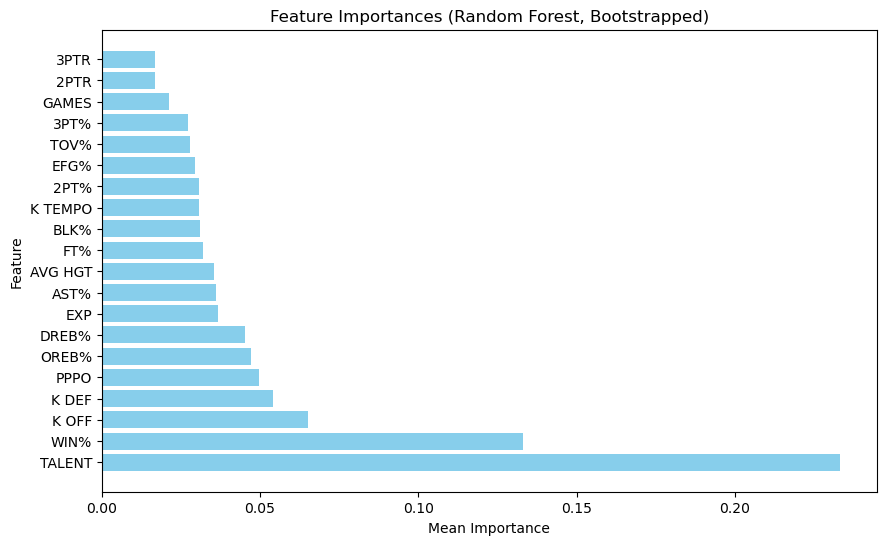

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(mean_importances_sorted.index, mean_importances_sorted.values, color='skyblue')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest, Bootstrapped)')
plt.show()

In [12]:
existing_features = ['WIN%', 'EFG%', 'BLK%', 'AST%', '3PTR', 'AVG HGT', 'EXP', 'FT%', 'TALENT', 'OREB%', 'DREB%', 'PPPO', '2PT%', '3PT%', 'TOV%', 'K TEMPO', 'K OFF', 'K DEF', 'GAMES', '2PTR']
feature_weights = [0.121102, 0.029612, 0.032326, 0.03563, 0.016698, 0.035881, 0.03771,  0.031517, 0.22728, 0.048425, 0.044098, 0.053437, 0.031007, 0.029619, 0.028879, 0.031032, 0.069939, 0.057944, 0.021567, 0.016297]  # Adjust the weights as needed

scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df[existing_features])
X_scaled_df = pd.DataFrame(X_scaled, columns=existing_features)
merged_df['Epicness'] = sum(X_scaled_df[feature] * weight for feature, weight in zip(existing_features, feature_weights))
existing_features.append('Epicness')

X = merged_df[existing_features]
y = merged_df['WINS']

In [13]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_bootstrapped = pd.concat([X_scaled, y], axis=1)
n_samples = 50
rfr = RandomForestRegressor()
columns = df_bootstrapped.drop('WINS', axis=1).columns
coefficients = pd.DataFrame(index=columns, columns=range(n_samples))

for k in range(n_samples):
    df_bootstrap = df_bootstrapped.sample(frac=1.0, replace=True)
    X_bootstrap = df_bootstrap.drop('WINS', axis=1)
    y_bootstrap = df_bootstrap['WINS']
    rfr.fit(X_bootstrap, y_bootstrap)
    coefficients.iloc[:, k] = rfr.feature_importances_

mean_importances = coefficients.mean(axis=1)
mean_importances_sorted = mean_importances.sort_values(ascending=False)
print("Mean Feature Importances (Ordered by Magnitude):")
print(mean_importances_sorted)

Mean Feature Importances (Ordered by Magnitude):
Epicness    0.260816
TALENT      0.105793
K DEF       0.065475
WIN%        0.054681
OREB%       0.045707
DREB%       0.038899
AST%        0.037468
EXP         0.036035
AVG HGT     0.034791
K OFF       0.033673
TOV%         0.03351
K TEMPO     0.033261
FT%          0.03319
3PT%        0.030029
BLK%        0.029337
PPPO        0.024692
2PT%        0.023716
GAMES       0.023711
EFG%         0.02282
3PTR        0.016434
2PTR         0.01596
dtype: object


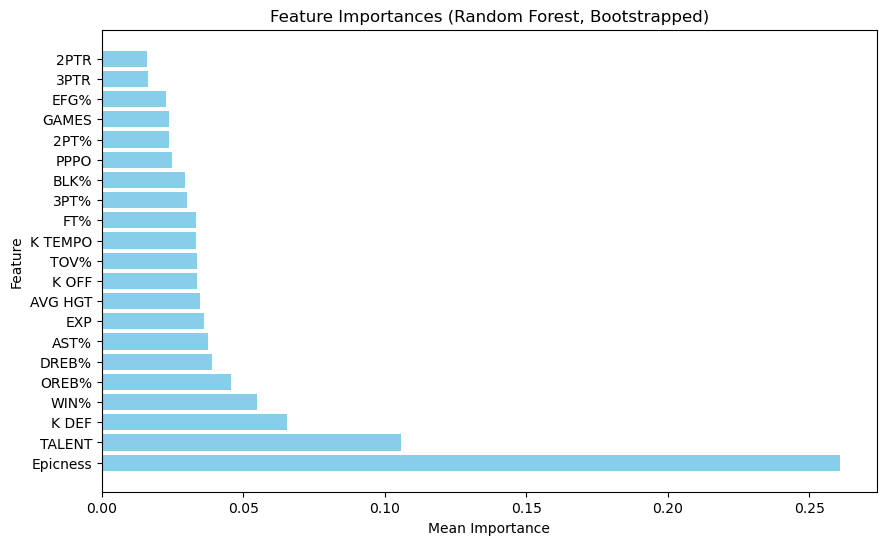

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(mean_importances_sorted.index, mean_importances_sorted.values, color='skyblue')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest, Bootstrapped)')
plt.show()

In [15]:
df_original = pd.read_csv("OtherDatasets/KenPom Barttorvik.csv")

In [25]:
df_original['Epicness'] = sum(df_original[feature] * weight for feature, weight in zip(existing_features, feature_weights))

df2 = pd.DataFrame()
df2['TEAM'] = df_original[df_original['YEAR'] == 2024]['TEAM']
df2['Epicness'] = df_original[df_original['YEAR'] == 2024]['Epicness']

df2.sort_values(by='Epicness',ascending=False)

,TEAM,Epicness
16,Duke,65.455521
41,North Carolina,64.866699
2,Arizona,62.635810
29,Kentucky,61.969551
20,Gonzaga,61.522339
...,...,...
17,Duquesne,42.325316
21,Grambling St.,42.284560
48,Saint Peter's,40.423150
36,Montana St.,39.936271
